In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [3]:
(x_train,y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 38s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])


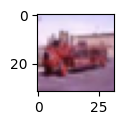

In [19]:
plot_sample(67)

# Scaling the data sample for better accuracy 

In [20]:
x_train_scaled = (x_train)/255
x_test_scaled = (x_test) /255


In [22]:
x_test_scaled[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

# perform onehot encoding
mark every categorical data into a perticular group

In [23]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = 'float32'
)
    

In [25]:
y_train_categorical[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [26]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = 'float32'
)
 

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 95s 60ms/step - loss: 1.8117 - accuracy: 0.3537
Epoch 2/50
1563/1563 [==============================] - 96s 61ms/step - loss: 1.6225 - accuracy: 0.4278
Epoch 3/50
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5429 - accuracy: 0.4563
Epoch 4/50
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4799 - accuracy: 0.4801
Epoch 5/50
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4326 - accuracy: 0.4967
Epoch 6/50
1563/1563 [==============================] - 93s 60ms/step - loss: 1.3891 - accuracy: 0.5103
Epoch 7/50
1563/1563 [==============================] - 95s 61ms/step - loss: 1.3527 - accuracy: 0.5228
Epoch 8/50
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3167 - accuracy: 0.5375
Epoch 9/50
1563/1563 [==============================] - 97s 62ms/step - loss: 1.2856 - accuracy: 0.5478
Epoch 10/50
1563/1563 [==============================] - 99s 63m

In [42]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [48]:
classes[np.argmax(model.predict(x_test_scaled)[3])]

313/313 [==============================] - 5s 17ms/step


'airplane'

In [47]:
classes[y_test[3][0]]

'airplane'

In [51]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 5s 16ms/step - loss: 1.5992 - accuracy: 0.5572


[1.5992273092269897, 0.557200014591217]